In [51]:
import pandas as pd

In [52]:
# open txt file
with open('data/r101_copy.txt', 'r') as file:
    data = file.readlines()

data

['CUST NO.   XCOORD.   YCOORD.    DEMAND   READY_TIME   DUE_DATE   SERVICE_TIME\n',
 ' \n',
 '    0          35      35           0       0         230           0\n',
 '    1          41      49          10     161         171          10\n',
 '    2          35      17           7      50          60          10\n',
 '    3          55      45          13     116         126          10\n',
 '    4          55      20          19     149         159          10\n',
 '    5          15      30          26      34          44          10\n',
 '    6          25      30           3      99         109          10\n',
 '    7          20      50           5      81          91          10\n',
 '    8          10      43           9      95         105          10\n',
 '    9          55      60          16      97         107          10\n',
 '   10          30      60          16     124         134          10\n',
 '   11          20      65          12      67          77          10\

In [30]:
# turn into dataframe
df = pd.DataFrame(data, columns=['raw'])
df['raw'] = df['raw'].str.replace('\n', '', regex=False)

df_split = df['raw'].str.split(r'\s+', expand=True)
df_split

df_split.columns = ['customer', 'NUMBER', 'XCOORD', 'YCOORD', 'DEMAND', 'READY_TIME', 'DUE_DATE', 'SERVICE_TIME']
df_split

df_cleaned = df_split.drop(index=[0, 1]).reset_index(drop=True)
df_cleaned

df_cleaned = df_cleaned.drop(columns=['customer'])
df_cleaned.to_csv('data/r101.csv', index=False)
df_cleaned

,NUMBER,XCOORD,YCOORD,DEMAND,READY_TIME,DUE_DATE,SERVICE_TIME
0,0,35,35,0,0,230,0
1,1,41,49,10,161,171,10
2,2,35,17,7,50,60,10
3,3,55,45,13,116,126,10
4,4,55,20,19,149,159,10
...,...,...,...,...,...,...,...
96,96,22,27,11,135,145,10
97,97,25,21,12,133,143,10
98,98,19,21,10,58,68,10
99,99,20,26,9,83,93,10


# manipulating data

## creating distances

Based on euclidian distances, considering xcoord and ycoord

---

In [31]:
# calculating euclidian distances between coordinates

import pandas as pd
import numpy as np

df = pd.read_csv('data/r101.csv')
coordinates = df[['XCOORD', 'YCOORD']].values
num_points = len(coordinates)
distance_matrix_manual = np.zeros((num_points, num_points))

# funcao de distancia euclidiana
def euclidean_distance(point1, point2):
    delta_x = point1[0] - point2[0]
    delta_y = point1[1] - point2[1]

    return (delta_x**2 + delta_y**2) ** 0.5

# preencher a matriz com loops aninhados
for i in range(num_points):
    for j in range(num_points):
        if i == j:
            continue 
            
        point_i = coordinates[i] 
        point_j = coordinates[j] 
        
        distance_matrix_manual[i, j] = euclidean_distance(point_i, point_j)

print("--- Exemplo da Matriz ---")
print(f"Dist. Depósito (0) para Cliente 1: {distance_matrix_manual[0, 1]:.2f}")
print(f"Dist. Depósito (0) para Cliente 2: {distance_matrix_manual[0, 2]:.2f}")
print(f"Dist. Cliente 1 para Cliente 2: {distance_matrix_manual[1, 2]:.2f}")

--- Exemplo da Matriz Manual ---
Dist. Depósito (0) para Cliente 1: 15.23
Dist. Depósito (0) para Cliente 2: 18.00
Dist. Cliente 1 para Cliente 2: 32.56


In [35]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

df = pd.read_csv('data/r101.csv')
coordinates = df[['XCOORD', 'YCOORD']].values
distance_matrix = squareform(pdist(coordinates, 'euclidean'))
output_matrix_file = 'data/distance_matrix.csv'

np.savetxt(output_matrix_file, distance_matrix, delimiter=',')

print("\n--- Exemplo da Matriz de Distâncias ---")
print(f"Dist. Depósito (0) para Cliente 1: {distance_matrix[0, 1]:.2f}")
print(f"Dist. Depósito (0) para Cliente 2: {distance_matrix[0, 2]:.2f}")
print(f"Dist. Cliente 1 para Cliente 2: {distance_matrix[1, 2]:.2f}")
print(f"Dist. Cliente 5 para Cliente 5: {distance_matrix[5, 5]:.2f}")
print(f"Dist. Cliente 1 -> 2: {distance_matrix[1, 2]:.2f}")
print(f"Dist. Cliente 2 -> 1: {distance_matrix[2, 1]:.2f}")

Matriz de distâncias (101x101) salva em 'data/distance_matrix.csv'

--- Exemplo da Matriz de Distâncias ---
Dist. Depósito (0) para Cliente 1: 15.23
Dist. Depósito (0) para Cliente 2: 18.00
Dist. Cliente 1 para Cliente 2: 32.56
Dist. Cliente 5 para Cliente 5: 0.00
Dist. Cliente 1 -> 2: 32.56
Dist. Cliente 2 -> 1: 32.56


## EDA r101

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('data/r101.csv')
distance_matrix = np.loadtxt('data/distance_matrix.csv', delimiter=',')

print("--- 1. Informações Básicas (Tipos e Nulos) ---")
print(df.info())

print("\n--- 2. Resumo Estatístico (Todos os Dados) ---")
print(df.describe().round(2))

depot_df = df[df['NUMBER'] == 0]
customers_df = df[df['NUMBER'] != 0]

print("\n--- 3. Resumo Estatístico (Apenas Clientes 1-100) ---")
print(customers_df.describe().round(2))

--- 1. Informações Básicas (Tipos e Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   NUMBER        101 non-null    int64
 1   XCOORD        101 non-null    int64
 2   YCOORD        101 non-null    int64
 3   DEMAND        101 non-null    int64
 4   READY_TIME    101 non-null    int64
 5   DUE_DATE      101 non-null    int64
 6   SERVICE_TIME  101 non-null    int64
dtypes: int64(7)
memory usage: 5.7 KB
None

--- 2. Resumo Estatístico (Todos os Dados) ---
       NUMBER  XCOORD  YCOORD  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME
count   101.0  101.00  101.00  101.00      101.00    101.00         101.0
mean     50.0   33.71   35.91   14.44       95.52    107.70           9.9
std      29.3   18.27   19.39    8.94       46.34     46.97           1.0
min       0.0    2.00    3.00    0.00        0.00     28.00           0.0
25%      25.0   19.

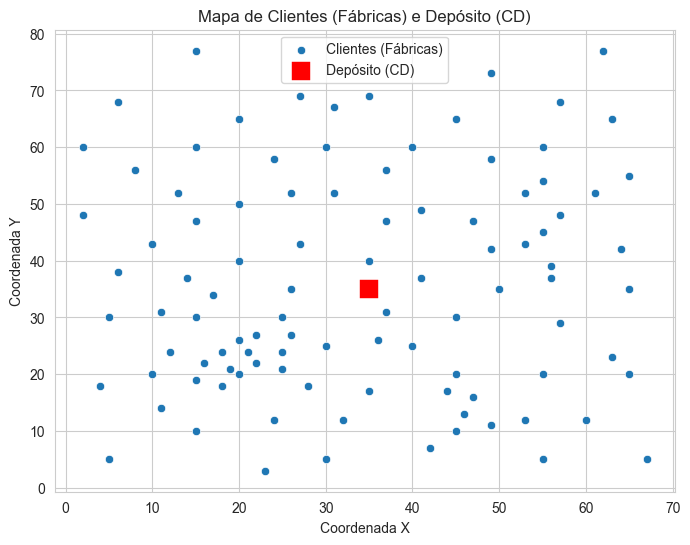

In [50]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=customers_df, 
    x='XCOORD', 
    y='YCOORD', 
    label='Clientes (Fábricas)'
)

sns.scatterplot(
    data=depot_df, 
    x='XCOORD', 
    y='YCOORD', 
    color='red', 
    s=200,
    marker='s',
    label='Depósito (CD)'
)

plt.title('Mapa de Clientes (Fábricas) e Depósito (CD)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.show()

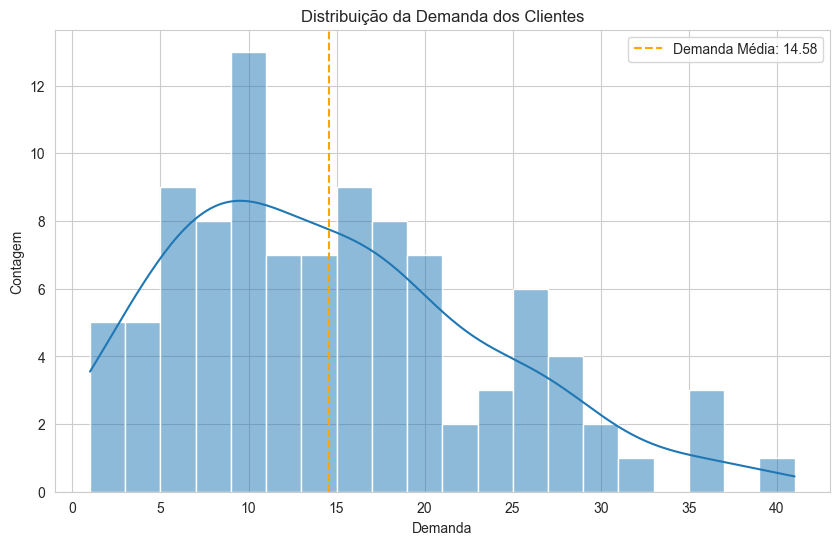


Total Demanda Clientes: 1458
Capacidade Veículo: 200
Número MÍNIMO Teórico de Rotas: 8.0


In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['DEMAND'], bins=20, kde=True)

capacidade_veiculo = 200 

plt.axvline(
    customers_df['DEMAND'].mean(), 
    color='orange', 
    linestyle='--', 
    label=f'Demanda Média: {customers_df["DEMAND"].mean():.2f}'
)

plt.title('Distribuição da Demanda dos Clientes')
plt.xlabel('Demanda')
plt.ylabel('Contagem')
plt.legend()
plt.show()

total_demand = customers_df['DEMAND'].sum()
min_rotas = np.ceil(total_demand / capacidade_veiculo)

print(f"\nTotal Demanda Clientes: {total_demand}")
print(f"Capacidade Veículo: {capacidade_veiculo}")
print(f"Número MÍNIMO Teórico de Rotas: {min_rotas}")

In [43]:
customers_df['TIME_WINDOW_DURATION'] = (
    customers_df['DUE_DATE'] - customers_df['READY_TIME']
)

customers_df

/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_80736/2455415761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['TIME_WINDOW_DURATION'] = (


,NUMBER,XCOORD,YCOORD,DEMAND,READY_TIME,DUE_DATE,SERVICE_TIME,TIME_WINDOW_DURATION
1,1,41,49,10,161,171,10,10
2,2,35,17,7,50,60,10,10
3,3,55,45,13,116,126,10,10
4,4,55,20,19,149,159,10,10
5,5,15,30,26,34,44,10,10
...,...,...,...,...,...,...,...,...
96,96,22,27,11,135,145,10,10
97,97,25,21,12,133,143,10,10
98,98,19,21,10,58,68,10,10
99,99,20,26,9,83,93,10,10


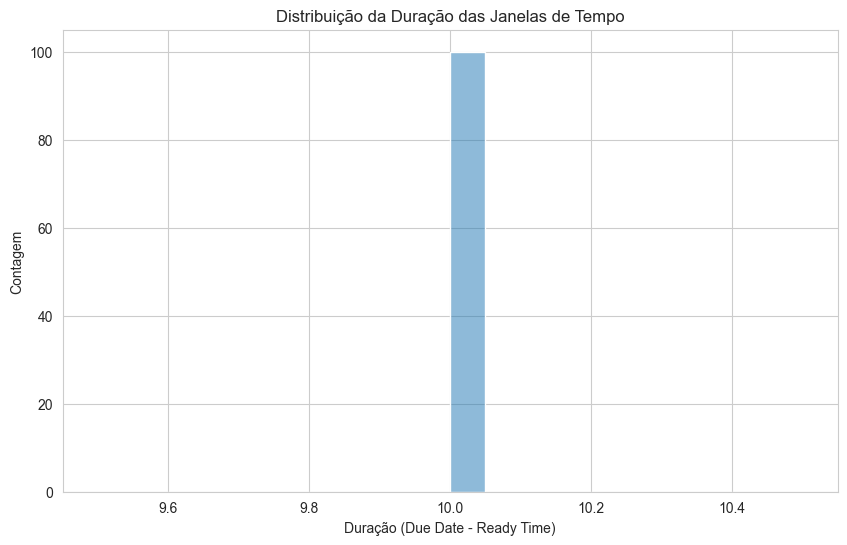

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['TIME_WINDOW_DURATION'], bins=20, kde=True)
plt.title('Distribuição da Duração das Janelas de Tempo')
plt.xlabel('Duração (Due Date - Ready Time)')
plt.ylabel('Contagem')
plt.show()


--- 4. Análise do Tempo de Serviço ---
SERVICE_TIME
10    100
Name: count, dtype: int64
O tempo de serviço é CONSTANTE para todos os clientes.


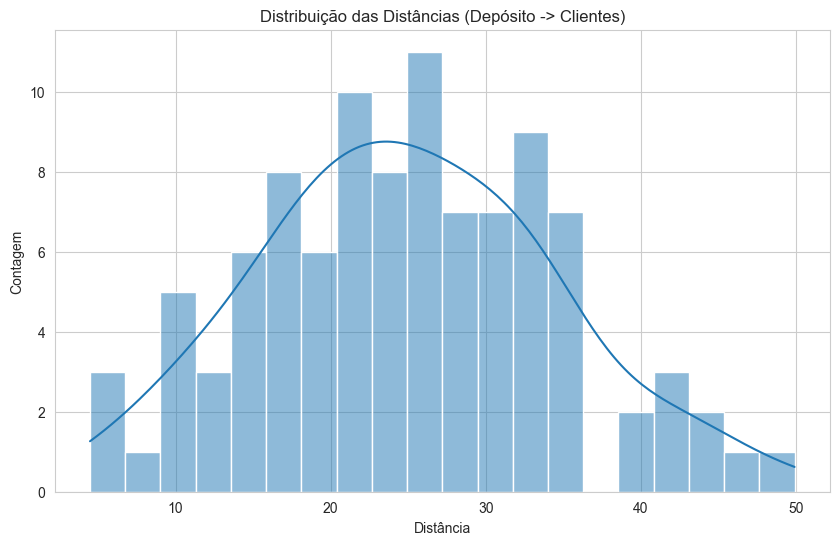

In [45]:
service_time_counts = customers_df['SERVICE_TIME'].value_counts()

print(service_time_counts)

if len(service_time_counts) == 1:
    print("O tempo de serviço é CONSTANTE para todos os clientes.")
else:
    print("O tempo de serviço é VARIÁVEL.")
    
if distance_matrix is not None:
    dist_from_depot = distance_matrix[0, 1:] 
    
    plt.figure(figsize=(10, 6))
    sns.histplot(dist_from_depot, bins=20, kde=True)
    plt.title('Distribuição das Distâncias (Depósito -> Clientes)')
    plt.xlabel('Distância')
    plt.ylabel('Contagem')
    plt.show()